In [1]:
# 1. Instalar y cargar Kaggle, descomprimir el dataset
!pip install -q kaggle
from google.colab import files

# Subir kaggle.json con tus credenciales
uploaded = files.upload()

# Crear el directorio .kaggle y mover kaggle.json
!mkdir -p ~/.kaggle
!cp "{list(uploaded.keys())[0]}" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Descargar y descomprimir el dataset CIFAR-10
!kaggle competitions download -c cifar-10
!unzip cifar-10.zip -d ./cifar-10

# Instalar librería para descomprimir .7z
!pip install py7zr
import py7zr

# Descomprimir las imágenes de entrenamiento
with py7zr.SevenZipFile('/content/cifar-10/train.7z', mode='r') as z:
    z.extractall(path='/content/cifar-10/train')

Saving kaggle.json to kaggle.json
100% 713M/715M [00:09<00:00, 92.6MB/s]
100% 715M/715M [00:09<00:00, 76.0MB/s]
Archive:  cifar-10.zip
  inflating: ./cifar-10/sampleSubmission.csv  
  inflating: ./cifar-10/test.7z      
  inflating: ./cifar-10/train.7z     
  inflating: ./cifar-10/trainLabels.csv  
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 30.1 MB/s eta 0:00:00


Imagen: 38573.png, Tamaño: 32x32
Imagen: 15381.png, Tamaño: 32x32
Imagen: 27481.png, Tamaño: 32x32
Imagen: 278.png, Tamaño: 32x32
Imagen: 29573.png, Tamaño: 32x32


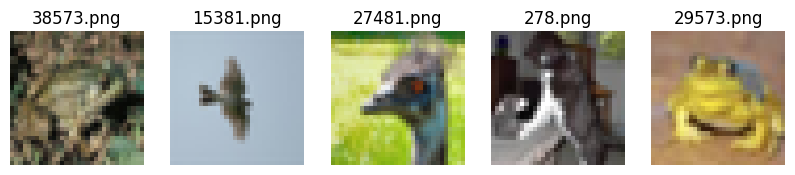

In [2]:
# 2. Hacer un muestreo del dataset para verificar su contenido y tamaño
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Directorio de las imágenes
train_dir = '/content/cifar-10/train/train'

# Obtener una lista de archivos de imagen
image_files = [f for f in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir, f))]

# Seleccionar 5 imágenes aleatoriamente
random_images = random.sample(image_files, 5)

# Mostrar las imágenes y sus dimensiones
plt.figure(figsize=(10,5))
for i, image_file in enumerate(random_images):
    img = Image.open(os.path.join(train_dir, image_file))
    width, height = img.size
    print(f"Imagen: {image_file}, Tamaño: {width}x{height}")
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(image_file)
plt.show()

# **Clases de CIFAR-10**
airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck


In [3]:
# 3. Tamaño de elementos para carpeta train
import os

# ruta de la carpeta
dir_path = r'/content/cifar-10/train/train'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 50000


In [4]:
# 4. Análisis rápido de las etiquetas de trainLabels.csv
import pandas as pd

# Cargar el CSV
labels_df = pd.read_csv('/content/cifar-10/trainLabels.csv')

labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [5]:
print(labels_df.size)

100000


In [6]:
# 3. Crear listas de imágenes y etiquetas
from sklearn.model_selection import train_test_split
import shutil
import os

# Asegurarse de que el ID esté correctamente formateado para coincidir con los nombres de archivo

images = labels_df['id'].apply(lambda x: f'{x}.png').values
labels = labels_df['label'].values

# Dividir en entrenamientos y validación
train_imgs, val_imgs, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, stratify=labels, random_state=42)

# Crear las carpetas de entrenamiento y validación
train_path = '/content/dataset/train'
val_path = '/content/dataset/val'

# Crear caroetas por clase dentro de val y train
for label in labels_df["label"].unique():
  os.makedirs(os.path.join(train_path, label), exist_ok=True)
  os.makedirs(os.path.join(val_path, label), exist_ok=True)

train_count = 0
val_count = 0

# Mover las imágenes de entrenamiento
for img, label in zip(train_imgs, train_labels):
    img_src = f'/content/cifar-10/train/train/{img}'
    img_dst = os.path.join(train_path, str(label), img)
    if os.path.exists(img_src):  # Verificar si la imagen existe
        shutil.move(img_src, img_dst)
        train_count += 1

print(f'Número de imágenes movidas a entrenamiento: {train_count}')

# Mover las imágenes de validación
for img, label in zip(val_imgs, val_labels):
    img_src = f'/content/cifar-10/train/train/{img}'
    img_dst = os.path.join(val_path, str(label), img)
    if os.path.exists(img_src):  # Verificar si la imagen existe
        shutil.move(img_src, img_dst)
        val_count += 1

print(f'Número de imágenes movidas a validación: {val_count}')

Número de imágenes movidas a entrenamiento: 40000
Número de imágenes movidas a validación: 10000


In [7]:
# 3.1 Tamaño de elementos para carpeta train
import os

# ruta de la carpeta
dir_path = r'/content/dataset/train/airplane'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 4000


In [8]:
# 3.2 Tamaño de elementos para carpeta train
import os

# ruta de la carpeta
dir_path = r'/content/dataset/train/cat'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 4000


In [9]:
# 3.3 Tamaño de elementos para carpeta train
import os

# ruta de la carpeta
dir_path = r'/content/dataset/val/deer'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 1000


In [10]:
# 6. Verificar que las imágenes se han movido de forma exitosa a las carpetas
import os

def is_directory_empty(directory):
  return not os.listdir(directory)

directory_train =  "/content/dataset/train/airplane"

if is_directory_empty(directory_train):
  print("La carpeta está vacía para train.")
else:
  print("La carpeta no está vacía para train.")

directory_val =  "/content/dataset/val/airplane"

if is_directory_empty(directory_train):
  print("La carpeta está vacía para val.")
else:
  print("La carpeta no está vacía para val.")

La carpeta no está vacía para train.
La carpeta no está vacía para val.


In [11]:
# 3.1. Tamaño de elementos para carpeta train
import os

# ruta de la carpeta
dir_path = r'/content/dataset/train/airplane'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 4000


In [12]:
# 3.2 Tamaño de elementos para carpeta train
import os

# ruta de la carpeta
dir_path = r'/content/dataset/train/automobile'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 4000


In [13]:
# 3.2 Tamaño de elementos para carpeta train
import os

# ruta de la carpeta
dir_path = r'/content/dataset/train/bird'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 4000


In [14]:
# 3.1. Tamaño de elementos para carpeta VAL
import os

# ruta de la carpeta
dir_path = r'/content/dataset/val/airplane'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 1000


In [15]:
### ENTRENAMIENTO DEL MODELO ####
# 7. Entrenar el modelo
!pip install ultralytics
from ultralytics import YOLO

# Cargar el modelo yolov8n-cls.pt para clasificación
model = YOLO('yolov8n-cls.pt')
# Entrenar el modelo con CIFAR-10
model.train(data='/content/dataset', epochs=20, imgsz=32)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.5/882.5 kB 23.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.31M/5.31M [00:00<00:00, 100MB/s]


Ultralytics 8.3.8 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/dataset, epochs=20, time=None, patience=100, batch=16, imgsz=32, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True,

100%|██████████| 5.35M/5.35M [00:00<00:00, 98.6MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/train... 40000 images, 0 corrupt: 100%|██████████| 40000/40000 [00:07<00:00, 5127.31it/s]


train: New cache created: /content/dataset/train.cache


val: Scanning /content/dataset/val... 10000 images, 0 corrupt: 100%|██████████| 10000/10000 [00:01<00:00, 5045.74it/s]


val: New cache created: /content/dataset/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 32 train, 32 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/20     0.132G      2.563         16         32:   0%|          | 9/2500 [00:01<04:07, 10.05it/s]

       1/20     0.132G      2.606         16         32:   1%|          | 21/2500 [00:02<03:09, 13.10it/s]
100%|██████████| 755k/755k [00:00<00:00, 19.8MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:08<00:00, 35.27it/s]

                   all      0.508      0.927



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:08<00:00, 37.00it/s]

                   all      0.522      0.936



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:08<00:00, 35.54it/s]

                   all      0.586      0.945



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 45.36it/s]

                   all      0.653       0.97



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:05<00:00, 58.38it/s]

                   all      0.671       0.97



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 48.56it/s]

                   all      0.689      0.971



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 42.65it/s]


                   all       0.69      0.975

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:05<00:00, 52.70it/s]


                   all      0.696       0.98

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:05<00:00, 58.40it/s]

                   all      0.711      0.979



      Epoch    GPU_mem       loss  Instances       Size


      10/20     0.109G      1.162         16         32: 100%|██████████| 2500/2500 [01:54<00:00, 21.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:05<00:00, 53.81it/s]

                   all      0.734      0.982



      Epoch    GPU_mem       loss  Instances       Size


      11/20     0.109G      1.133         16         32: 100%|██████████| 2500/2500 [01:53<00:00, 22.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 45.14it/s]

                   all      0.727      0.981



      Epoch    GPU_mem       loss  Instances       Size


      12/20     0.109G      1.115         16         32: 100%|██████████| 2500/2500 [01:49<00:00, 22.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:08<00:00, 37.95it/s]

                   all      0.731      0.979



      Epoch    GPU_mem       loss  Instances       Size


      13/20     0.109G      1.111         16         32: 100%|██████████| 2500/2500 [01:48<00:00, 23.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 46.99it/s]

                   all      0.728      0.981



      Epoch    GPU_mem       loss  Instances       Size


      14/20     0.109G      1.072         16         32: 100%|██████████| 2500/2500 [01:52<00:00, 22.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:05<00:00, 56.50it/s]

                   all      0.738      0.983



      Epoch    GPU_mem       loss  Instances       Size


      15/20     0.109G      1.047         16         32: 100%|██████████| 2500/2500 [01:59<00:00, 20.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 42.20it/s]


                   all      0.754      0.984

      Epoch    GPU_mem       loss  Instances       Size


      16/20     0.109G      1.036         16         32: 100%|██████████| 2500/2500 [01:59<00:00, 20.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 40.67it/s]


                   all      0.759      0.984

      Epoch    GPU_mem       loss  Instances       Size


      17/20     0.109G       1.01         16         32: 100%|██████████| 2500/2500 [01:58<00:00, 21.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:08<00:00, 38.78it/s]

                   all      0.757      0.985



      Epoch    GPU_mem       loss  Instances       Size


      18/20     0.109G       0.98         16         32: 100%|██████████| 2500/2500 [02:01<00:00, 20.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 50.04it/s]

                   all      0.751      0.986



      Epoch    GPU_mem       loss  Instances       Size


      19/20     0.109G     0.9646         16         32: 100%|██████████| 2500/2500 [02:01<00:00, 20.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:05<00:00, 57.73it/s]

                   all      0.743      0.985



      Epoch    GPU_mem       loss  Instances       Size


      20/20     0.109G     0.9379         16         32: 100%|██████████| 2500/2500 [02:04<00:00, 20.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 47.61it/s]


                   all      0.736      0.985

20 epochs completed in 0.687 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.8 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,447,690 parameters, 0 gradients, 3.3 GFLOPs
train: /content/dataset/train... found 40000 images in 10 classes ✅ 
val: /content/dataset/val... found 10000 images in 10 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:05<00:00, 53.55it/s]


                   all      0.759      0.984
Speed: 0.0ms preprocess, 0.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b0a4ae43220>
curves: []
curves_results: []
fitness: 0.8716000020503998
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7590000033378601, 'metrics/accuracy_top5': 0.9842000007629395, 'fitness': 0.8716000020503998}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.011421680450439453, 'inference': 0.30826783180236816, 'loss': 0.0004799842834472656, 'postprocess': 0.0005187034606933595}
task: 'classify'
top1: 0.7590000033378601
top5: 0.9842000007629395
training: {'epochs': 20, 'seconds': 2472.8527204990387}

In [16]:
# 8. Visualizar los resultados de las gráficas YOLO
import os
from PIL import Image
import matplotlib.pyplot as plt

# Ruta del directorio donde se encuentran las imágenes
directory = "/content/runs/classify/train"

# Listar todos los archivos en el directorio
files = os.listdir(directory)
print("Estos son los archivos de resultado de entrenamiento", files)

# Filtrar solo los archivos de imagen (extensiones comunes)
image_files = [file for file in files if file.endswith(('.png', '.jpg', '.jpeg'))]

# Mostrar todas las imágenes
# Mostrar todas las imágenes
if image_files:
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)

        # Cargar la imagen
        image = Image.open(image_path)

        # Mostrar la imagen
        plt.figure()
        plt.imshow(image)
        plt.axis('off')  # Ocultar los ejes
        plt.title(image_file)  # Título con el nombre del archivo
    plt.show()
else:
    print("No se encontraron imágenes en la carpeta.")

Output hidden; open in https://colab.research.google.com to view.

In [17]:
# 9. Predicción con imagen del dataset
import os
from PIL import Image

directory = "/content/dataset/train/airplane"

# Si la carpeta tiene imágenes, carga la primera imagen
image_path = os.path.join(directory, os.listdir(directory)[0])
image = Image.open(image_path)

# Realizar la predicción con el modelo YOLO
results = model.predict(image, conf=0.25, save=True)

# Mostrar la imagen con las predicciones
image.show()


0: 32x32 airplane 0.97, bird 0.01, automobile 0.01, ship 0.01, cat 0.00, 7.6ms
Speed: 12.0ms preprocess, 7.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/train2


In [18]:
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/rana.jpg

# 10.1  Predicción con imagen de internet RANA
import os
from PIL import Image

directory = "/content/rana.jpg"

image = Image.open(directory)

# Realizar la predicción con el modelo YOLO
results = model.predict(image, conf=0.25, save=True)

# Mostrar la imagen con las predicciones
image.show()

--2024-10-08 20:26:47--  https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/rana.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107572 (105K) [image/jpeg]
Saving to: ‘rana.jpg’

rana.jpg            100%[===================>] 105.05K  --.-KB/s    in 0.02s   

2024-10-08 20:26:48 (6.22 MB/s) - ‘rana.jpg’ saved [107572/107572]


0: 32x32 frog 0.66, bird 0.24, airplane 0.03, deer 0.02, horse 0.01, 5.9ms
Speed: 14.4ms preprocess, 5.9ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/train3


In [19]:
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/cauto_test.jpg

# 10.1  Predicción con imagen de internet RANA
import os
from PIL import Image

directory = "/content/cauto_test.jpg"

image = Image.open(directory)

# Realizar la predicción con el modelo YOLO
results = model.predict(image, conf=0.25, save=True)

# Mostrar la imagen con las predicciones
image.show()

--2024-10-08 20:26:48--  https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/cauto_test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 350294 (342K) [image/jpeg]
Saving to: ‘cauto_test.jpg’

cauto_test.jpg      100%[===================>] 342.08K  --.-KB/s    in 0.03s   

2024-10-08 20:26:48 (12.6 MB/s) - ‘cauto_test.jpg’ saved [350294/350294]


0: 32x32 automobile 0.96, truck 0.02, airplane 0.01, ship 0.01, deer 0.00, 3.0ms
Speed: 4.3ms preprocess, 3.0ms inference, 0.0ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/train4


In [20]:
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/Pelusa.jpeg

# 10.1  Predicción con imagen de internet RANA
import os
from PIL import Image

directory = "/content/Pelusa.jpeg"

image = Image.open(directory)

# Realizar la predicción con el modelo YOLO
results = model.predict(image, conf=0.25, save=True)

# Mostrar la imagen con las predicciones
image.show()

--2024-10-08 20:26:49--  https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/Pelusa.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 239195 (234K) [image/jpeg]
Saving to: ‘Pelusa.jpeg’

Pelusa.jpeg         100%[===================>] 233.59K  --.-KB/s    in 0.02s   

2024-10-08 20:26:49 (10.2 MB/s) - ‘Pelusa.jpeg’ saved [239195/239195]


0: 32x32 horse 0.52, cat 0.16, deer 0.12, truck 0.07, airplane 0.05, 5.8ms
Speed: 22.9ms preprocess, 5.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/train5


In [21]:
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/gato3.JPG

# 10.1  Predicción con imagen de internet RANA
import os
from PIL import Image

directory = "/content/gato3.JPG"

image = Image.open(directory)

# Realizar la predicción con el modelo YOLO
results = model.predict(image, conf=0.25, save=True)

# Mostrar la imagen con las predicciones
image.show()

--2024-10-08 20:26:50--  https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/gato3.JPG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88203 (86K) [image/jpeg]
Saving to: ‘gato3.JPG’

gato3.JPG           100%[===================>]  86.14K  --.-KB/s    in 0.01s   

2024-10-08 20:26:50 (6.05 MB/s) - ‘gato3.JPG’ saved [88203/88203]


0: 32x32 cat 0.50, dog 0.40, horse 0.03, bird 0.03, deer 0.02, 5.3ms
Speed: 9.2ms preprocess, 5.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/train6


In [22]:
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/Minicky.jpeg

# 10.1  Predicción con imagen de internet RANA
import os
from PIL import Image

directory = "/content/Minicky.jpeg"

image = Image.open(directory)

# Realizar la predicción con el modelo YOLO
results = model.predict(image, conf=0.25, save=True)

# Mostrar la imagen con las predicciones
image.show()

--2024-10-08 20:26:51--  https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/Minicky.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 213012 (208K) [image/jpeg]
Saving to: ‘Minicky.jpeg’

Minicky.jpeg        100%[===================>] 208.02K  --.-KB/s    in 0.02s   

2024-10-08 20:26:51 (8.21 MB/s) - ‘Minicky.jpeg’ saved [213012/213012]


0: 32x32 cat 0.33, ship 0.20, automobile 0.13, frog 0.12, airplane 0.09, 4.8ms
Speed: 34.6ms preprocess, 4.8ms inference, 3.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/train7


In [23]:
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/Pelusa_zoom.png

# 10.1  Predicción con imagen de internet RANA
import os
from PIL import Image

directory = "/content/Pelusa_zoom.png"

image = Image.open(directory)

# Realizar la predicción con el modelo YOLO
results = model.predict(image, conf=0.25, save=True)

# Mostrar la imagen con las predicciones
image.show()

--2024-10-08 20:26:52--  https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/Pelusa_zoom.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 443434 (433K) [image/png]
Saving to: ‘Pelusa_zoom.png’

Pelusa_zoom.png     100%[===================>] 433.04K  --.-KB/s    in 0.04s   

2024-10-08 20:26:53 (10.3 MB/s) - ‘Pelusa_zoom.png’ saved [443434/443434]


0: 32x32 cat 0.39, frog 0.33, ship 0.14, truck 0.03, dog 0.03, 3.6ms
Speed: 4.3ms preprocess, 3.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/train8


In [24]:
# 11. Validar el modelo
from ultralytics import YOLO

# Cargar el modelo
model = YOLO("/content/runs/classify/train/weights/best.pt")

# Validar el modelo
metrics = model.val()

# Acceder a las métricas de clasificación
print(f"Top-1 Accuracy: {metrics.top1}")
print(f"Top-5 Accuracy: {metrics.top5}")
print(f"Fitness: {metrics.fitness}")

# Si quieres ver todas las métricas disponibles
print("\nTodas las métricas:")
for key, value in metrics.results_dict.items():
    print(f"{key}: {value}")

Ultralytics 8.3.8 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,447,690 parameters, 0 gradients, 3.3 GFLOPs
train: /content/dataset/train... found 40000 images in 10 classes ✅ 
val: /content/dataset/val... found 10000 images in 10 classes ✅ 
test: None...


val: Scanning /content/dataset/val... 10000 images, 0 corrupt: 100%|██████████| 10000/10000 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 625/625 [00:16<00:00, 38.41it/s]


                   all      0.759      0.984
Speed: 0.0ms preprocess, 0.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val
Top-1 Accuracy: 0.7590000033378601
Top-5 Accuracy: 0.9842000007629395
Fitness: 0.8716000020503998

Todas las métricas:
metrics/accuracy_top1: 0.7590000033378601
metrics/accuracy_top5: 0.9842000007629395
fitness: 0.8716000020503998


In [25]:
import os
from PIL import Image
from ultralytics import YOLO  # Asegúrate de importar YOLO si no lo has hecho ya

# Ruta del modelo YOLO
model_path = r'/content/runs/classify/train/weights/best.pt'

# Cargar el modelo YOLO
model = YOLO(model_path)

# Ruta de la imagen local
image_path = r'/content/Pelusa.jpeg'

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB
if image.mode != 'RGB':
    image = image.convert('RGB')

# Realizar la predicción con el modelo YOLO usando predict() y un umbral de confianza de 0.25
results = model.predict(image, conf=0.25, save=True)

# Mostrar la imagen con las predicciones (si se ha guardado o procesado)
image.show()

# Procesar y mostrar los resultados de la predicción
for result in results:
    names = result.names  # Nombres de las clases
    top_class = result.probs.top1  # Índice de la clase con mayor probabilidad
    top_confidence = result.probs.top1conf.item()  # Probabilidad de la clase con mayor probabilidad

    print(f"Clase: {names[top_class]}, Confianza: {top_confidence:.2f}")

    # Si quieres mostrar todas las probabilidades:
    for i, prob in enumerate(result.probs.data):
        print(f"{names[i]}: {prob:.4f}")


0: 32x32 horse 0.52, cat 0.16, deer 0.12, truck 0.07, airplane 0.05, 3.7ms
Speed: 23.6ms preprocess, 3.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/predict
Clase: horse, Confianza: 0.52
airplane: 0.0524
automobile: 0.0169
bird: 0.0046
cat: 0.1600
deer: 0.1170
dog: 0.0491
frog: 0.0020
horse: 0.5229
ship: 0.0046
truck: 0.0705


In [26]:
import os
from PIL import Image
from ultralytics import YOLO  # Asegúrate de importar YOLO si no lo has hecho ya

# Ruta del modelo YOLO
model_path = r'/content/runs/classify/train/weights/best.pt'

# Cargar el modelo YOLO
model = YOLO(model_path)

# Ruta de la imagen local
image_path = r'/content/Pelusa_zoom.png'

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB
if image.mode != 'RGB':
    image = image.convert('RGB')

# Realizar la predicción con el modelo YOLO usando predict() y un umbral de confianza de 0.25
results = model.predict(image, conf=0.25, save=True)

# Mostrar la imagen con las predicciones (si se ha guardado o procesado)
image.show()

# Procesar y mostrar los resultados de la predicción
for result in results:
    names = result.names  # Nombres de las clases
    top_class = result.probs.top1  # Índice de la clase con mayor probabilidad
    top_confidence = result.probs.top1conf.item()  # Probabilidad de la clase con mayor probabilidad

    print(f"Clase: {names[top_class]}, Confianza: {top_confidence:.2f}")

    # Si quieres mostrar todas las probabilidades:
    for i, prob in enumerate(result.probs.data):
        print(f"{names[i]}: {prob:.4f}")


0: 32x32 cat 0.39, frog 0.33, ship 0.14, truck 0.03, dog 0.03, 4.8ms
Speed: 4.5ms preprocess, 4.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/predict2
Clase: cat, Confianza: 0.39
airplane: 0.0064
automobile: 0.0232
bird: 0.0276
cat: 0.3906
deer: 0.0120
dog: 0.0277
frog: 0.3279
horse: 0.0151
ship: 0.1388
truck: 0.0307


In [27]:
import os
from PIL import Image
from ultralytics import YOLO  # Asegúrate de importar YOLO si no lo has hecho ya

# Ruta del modelo YOLO
model_path = r'/content/runs/classify/train/weights/best.pt'

# Cargar el modelo YOLO
model = YOLO(model_path)

# Ruta de la imagen local
image_path = r'/content/cauto_test.jpg'

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB
if image.mode != 'RGB':
    image = image.convert('RGB')

# Realizar la predicción con el modelo YOLO usando predict() y un umbral de confianza de 0.25
results = model.predict(image, conf=0.25, save=True)

# Mostrar la imagen con las predicciones (si se ha guardado o procesado)
image.show()

# Procesar y mostrar los resultados de la predicción
for result in results:
    names = result.names  # Nombres de las clases
    top_class = result.probs.top1  # Índice de la clase con mayor probabilidad
    top_confidence = result.probs.top1conf.item()  # Probabilidad de la clase con mayor probabilidad

    print(f"Clase: {names[top_class]}, Confianza: {top_confidence:.2f}")

    # Si quieres mostrar todas las probabilidades:
    for i, prob in enumerate(result.probs.data):
        print(f"{names[i]}: {prob:.4f}")


0: 32x32 automobile 0.96, truck 0.02, airplane 0.01, ship 0.01, deer 0.00, 5.2ms
Speed: 14.3ms preprocess, 5.2ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/predict3
Clase: automobile, Confianza: 0.96
airplane: 0.0073
automobile: 0.9616
bird: 0.0008
cat: 0.0006
deer: 0.0016
dog: 0.0003
frog: 0.0013
horse: 0.0003
ship: 0.0051
truck: 0.0210


In [28]:
import os
from PIL import Image
from ultralytics import YOLO  # Asegúrate de importar YOLO si no lo has hecho ya

# Ruta del modelo YOLO
model_path = r'/content/runs/classify/train/weights/best.pt'

# Cargar el modelo YOLO
model = YOLO(model_path)

# Ruta de la imagen local
image_path = r'/content/rana.jpg'

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB
if image.mode != 'RGB':
    image = image.convert('RGB')

# Realizar la predicción con el modelo YOLO usando predict() y un umbral de confianza de 0.25
results = model.predict(image, conf=0.25, save=True)

# Mostrar la imagen con las predicciones (si se ha guardado o procesado)
image.show()

# Procesar y mostrar los resultados de la predicción
for result in results:
    names = result.names  # Nombres de las clases
    top_class = result.probs.top1  # Índice de la clase con mayor probabilidad
    top_confidence = result.probs.top1conf.item()  # Probabilidad de la clase con mayor probabilidad

    print(f"Clase: {names[top_class]}, Confianza: {top_confidence:.2f}")

    # Si quieres mostrar todas las probabilidades:
    for i, prob in enumerate(result.probs.data):
        print(f"{names[i]}: {prob:.4f}")


0: 32x32 frog 0.66, bird 0.24, airplane 0.03, deer 0.02, horse 0.01, 4.3ms
Speed: 15.1ms preprocess, 4.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/predict4
Clase: frog, Confianza: 0.66
airplane: 0.0325
automobile: 0.0025
bird: 0.2403
cat: 0.0106
deer: 0.0230
dog: 0.0067
frog: 0.6647
horse: 0.0146
ship: 0.0018
truck: 0.0033


In [29]:
import os
from PIL import Image
from ultralytics import YOLO  # Asegúrate de importar YOLO si no lo has hecho ya

# Ruta del modelo YOLO
model_path = r'/content/runs/classify/train/weights/best.pt'

# Cargar el modelo YOLO
model = YOLO(model_path)

# Ruta de la imagen local
image_path = r'/content/gato3.JPG'

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB
if image.mode != 'RGB':
    image = image.convert('RGB')

# Realizar la predicción con el modelo YOLO usando predict() y un umbral de confianza de 0.25
results = model.predict(image, conf=0.25, save=True)

# Mostrar la imagen con las predicciones (si se ha guardado o procesado)
image.show()

# Procesar y mostrar los resultados de la predicción
for result in results:
    names = result.names  # Nombres de las clases
    top_class = result.probs.top1  # Índice de la clase con mayor probabilidad
    top_confidence = result.probs.top1conf.item()  # Probabilidad de la clase con mayor probabilidad

    print(f"Clase: {names[top_class]}, Confianza: {top_confidence:.2f}")

    # Si quieres mostrar todas las probabilidades:
    for i, prob in enumerate(result.probs.data):
        print(f"{names[i]}: {prob:.4f}")


0: 32x32 cat 0.50, dog 0.40, horse 0.03, bird 0.03, deer 0.02, 16.6ms
Speed: 22.0ms preprocess, 16.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/predict5
Clase: cat, Confianza: 0.50
airplane: 0.0018
automobile: 0.0014
bird: 0.0293
cat: 0.4951
deer: 0.0225
dog: 0.3952
frog: 0.0163
horse: 0.0332
ship: 0.0030
truck: 0.0023


In [30]:
import os
from PIL import Image
from ultralytics import YOLO  # Asegúrate de importar YOLO si no lo has hecho ya

# Ruta del modelo YOLO
model_path = r'/content/runs/classify/train/weights/best.pt'

# Cargar el modelo YOLO
model = YOLO(model_path)

# Ruta de la imagen local
image_path = r'/content/Minicky.jpeg'

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB
if image.mode != 'RGB':
    image = image.convert('RGB')

# Realizar la predicción con el modelo YOLO usando predict() y un umbral de confianza de 0.25
results = model.predict(image, conf=0.25, save=True)

# Mostrar la imagen con las predicciones (si se ha guardado o procesado)
image.show()

# Procesar y mostrar los resultados de la predicción
for result in results:
    names = result.names  # Nombres de las clases
    top_class = result.probs.top1  # Índice de la clase con mayor probabilidad
    top_confidence = result.probs.top1conf.item()  # Probabilidad de la clase con mayor probabilidad

    print(f"Clase: {names[top_class]}, Confianza: {top_confidence:.2f}")

    # Si quieres mostrar todas las probabilidades:
    for i, prob in enumerate(result.probs.data):
        print(f"{names[i]}: {prob:.4f}")


0: 32x32 cat 0.33, ship 0.20, automobile 0.13, frog 0.12, airplane 0.09, 8.9ms
Speed: 37.2ms preprocess, 8.9ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/predict6
Clase: cat, Confianza: 0.33
airplane: 0.0928
automobile: 0.1290
bird: 0.0859
cat: 0.3290
deer: 0.0059
dog: 0.0166
frog: 0.1152
horse: 0.0071
ship: 0.2011
truck: 0.0173


In [31]:
# 14. Exportar modelo a onnx
from ultralytics import YOLO

model = YOLO(r'/content/runs/classify/train/weights/best.pt')  # load a custom trained model

# Export the model
model.export(format='onnx', opset=12, simplify=True)

Ultralytics 8.3.8 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.00GHz)
YOLOv8n-cls summary (fused): 73 layers, 1,447,690 parameters, 0 gradients, 3.3 GFLOPs

PyTorch: starting from '/content/runs/classify/train/weights/best.pt' with input shape (1, 3, 32, 32) BCHW and output shape(s) (1, 10) (2.8 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim==0.1.34', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 263.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.2/226.2 MB 232.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 215.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 180.3 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 16.9s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim==0.1.34', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or 

'/content/runs/classify/train/weights/best.onnx'

In [32]:
import onnxruntime as ort
from PIL import Image
import numpy as np
import os

# Ruta del modelo ONNX exportado
onnx_model_path = r'/content/runs/classify/train/weights/best.onnx'

# Cargar el modelo ONNX usando onnxruntime
session = ort.InferenceSession(onnx_model_path)

# Ruta de la imagen local
image_path = r'/content/cauto_test.jpg'  # Cambia esto a la ruta real de tu imagen

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB
if image.mode != 'RGB':
    image = image.convert('RGB')

# Redimensionar la imagen al tamaño adecuado para CIFAR-10 (32x32)
image = image.resize((32, 32))

# Convertir la imagen a un array numpy y escalar los valores de píxeles
image_np = np.array(image).astype(np.float32) / 255.0

# Cambiar el formato de la imagen a (1, 3, 32, 32) -> (batch_size, canales, alto, ancho)
image_np = np.transpose(image_np, (2, 0, 1))  # Cambiar los ejes para que esté en formato canales primero
image_np = np.expand_dims(image_np, axis=0)   # Añadir la dimensión de batch_size

# Realizar la predicción con el modelo ONNX
input_name = session.get_inputs()[0].name  # Obtener el nombre del primer input del modelo
output_name = session.get_outputs()[0].name  # Obtener el nombre del primer output del modelo
results = session.run([output_name], {input_name: image_np})

# Procesar los resultados de la predicción
predicciones = results[0][0]  # Acceder a las predicciones de la primera imagen
clase_detectada = np.argmax(predicciones)  # Obtener la clase con mayor probabilidad
probabilidad = np.max(predicciones)

# Nombres de las clases del CIFAR-10
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar la primera opción detectada
print(f"Primera opción detectada: {clases[clase_detectada]} con probabilidad {probabilidad:.2f}")

# Si quieres ver todas las probabilidades
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob:.4f}")

Primera opción detectada: truck con probabilidad 0.47
airplane: 0.1169
automobile: 0.3040
bird: 0.0044
cat: 0.0068
deer: 0.0151
dog: 0.0020
frog: 0.0105
horse: 0.0067
ship: 0.0651
truck: 0.4684


In [33]:
import onnxruntime as ort
from PIL import Image
import numpy as np
import os

# Ruta del modelo ONNX exportado
onnx_model_path = r'/content/runs/classify/train/weights/best.onnx'

# Cargar el modelo ONNX usando onnxruntime
session = ort.InferenceSession(onnx_model_path)

# Ruta de la imagen local
image_path = r'/content/rana.jpg'  # Cambia esto a la ruta real de tu imagen

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB
if image.mode != 'RGB':
    image = image.convert('RGB')

# Redimensionar la imagen al tamaño adecuado para CIFAR-10 (32x32)
image = image.resize((32, 32))

# Convertir la imagen a un array numpy y escalar los valores de píxeles
image_np = np.array(image).astype(np.float32) / 255.0

# Cambiar el formato de la imagen a (1, 3, 32, 32) -> (batch_size, canales, alto, ancho)
image_np = np.transpose(image_np, (2, 0, 1))  # Cambiar los ejes para que esté en formato canales primero
image_np = np.expand_dims(image_np, axis=0)   # Añadir la dimensión de batch_size

# Realizar la predicción con el modelo ONNX
input_name = session.get_inputs()[0].name  # Obtener el nombre del primer input del modelo
output_name = session.get_outputs()[0].name  # Obtener el nombre del primer output del modelo
results = session.run([output_name], {input_name: image_np})

# Procesar los resultados de la predicción
predicciones = results[0][0]  # Acceder a las predicciones de la primera imagen
clase_detectada = np.argmax(predicciones)  # Obtener la clase con mayor probabilidad
probabilidad = np.max(predicciones)

# Nombres de las clases del CIFAR-10
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar la primera opción detectada
print(f"Primera opción detectada: {clases[clase_detectada]} con probabilidad {probabilidad:.2f}")

# Si quieres ver todas las probabilidades
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob:.4f}")

Primera opción detectada: frog con probabilidad 0.71
airplane: 0.0054
automobile: 0.0010
bird: 0.2343
cat: 0.0122
deer: 0.0198
dog: 0.0079
frog: 0.7063
horse: 0.0108
ship: 0.0005
truck: 0.0018


In [34]:
import onnxruntime as ort
from PIL import Image
import numpy as np
import os

# Ruta del modelo ONNX exportado
onnx_model_path = r'/content/runs/classify/train/weights/best.onnx'

# Cargar el modelo ONNX usando onnxruntime
session = ort.InferenceSession(onnx_model_path)

# Ruta de la imagen local
image_path = r'/content/Pelusa.jpeg'  # Cambia esto a la ruta real de tu imagen

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB
if image.mode != 'RGB':
    image = image.convert('RGB')

# Redimensionar la imagen al tamaño adecuado para CIFAR-10 (32x32)
image = image.resize((32, 32))

# Convertir la imagen a un array numpy y escalar los valores de píxeles
image_np = np.array(image).astype(np.float32) / 255.0

# Cambiar el formato de la imagen a (1, 3, 32, 32) -> (batch_size, canales, alto, ancho)
image_np = np.transpose(image_np, (2, 0, 1))  # Cambiar los ejes para que esté en formato canales primero
image_np = np.expand_dims(image_np, axis=0)   # Añadir la dimensión de batch_size

# Realizar la predicción con el modelo ONNX
input_name = session.get_inputs()[0].name  # Obtener el nombre del primer input del modelo
output_name = session.get_outputs()[0].name  # Obtener el nombre del primer output del modelo
results = session.run([output_name], {input_name: image_np})

# Procesar los resultados de la predicción
predicciones = results[0][0]  # Acceder a las predicciones de la primera imagen
clase_detectada = np.argmax(predicciones)  # Obtener la clase con mayor probabilidad
probabilidad = np.max(predicciones)

# Nombres de las clases del CIFAR-10
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar la primera opción detectada
print(f"Primera opción detectada: {clases[clase_detectada]} con probabilidad {probabilidad:.2f}")

# Si quieres ver todas las probabilidades
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob:.4f}")

Primera opción detectada: horse con probabilidad 0.36
airplane: 0.1804
automobile: 0.0694
bird: 0.0062
cat: 0.0539
deer: 0.0220
dog: 0.0241
frog: 0.0016
horse: 0.3556
ship: 0.0348
truck: 0.2521


In [35]:
import onnxruntime as ort
from PIL import Image
import numpy as np
import os

# Ruta del modelo ONNX exportado
onnx_model_path = r'/content/runs/classify/train/weights/best.onnx'

# Cargar el modelo ONNX usando onnxruntime
session = ort.InferenceSession(onnx_model_path)

# Ruta de la imagen local
image_path = r'/content/Pelusa_zoom.png'  # Cambia esto a la ruta real de tu imagen

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB
if image.mode != 'RGB':
    image = image.convert('RGB')

# Redimensionar la imagen al tamaño adecuado para CIFAR-10 (32x32)
image = image.resize((32, 32))

# Convertir la imagen a un array numpy y escalar los valores de píxeles
image_np = np.array(image).astype(np.float32) / 255.0

# Cambiar el formato de la imagen a (1, 3, 32, 32) -> (batch_size, canales, alto, ancho)
image_np = np.transpose(image_np, (2, 0, 1))  # Cambiar los ejes para que esté en formato canales primero
image_np = np.expand_dims(image_np, axis=0)   # Añadir la dimensión de batch_size

# Realizar la predicción con el modelo ONNX
input_name = session.get_inputs()[0].name  # Obtener el nombre del primer input del modelo
output_name = session.get_outputs()[0].name  # Obtener el nombre del primer output del modelo
results = session.run([output_name], {input_name: image_np})

# Procesar los resultados de la predicción
predicciones = results[0][0]  # Acceder a las predicciones de la primera imagen
clase_detectada = np.argmax(predicciones)  # Obtener la clase con mayor probabilidad
probabilidad = np.max(predicciones)

# Nombres de las clases del CIFAR-10
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar la primera opción detectada
print(f"Primera opción detectada: {clases[clase_detectada]} con probabilidad {probabilidad:.2f}")

# Si quieres ver todas las probabilidades
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob:.4f}")

Primera opción detectada: cat con probabilidad 0.42
airplane: 0.0053
automobile: 0.0146
bird: 0.0265
cat: 0.4190
deer: 0.0107
dog: 0.0365
frog: 0.3549
horse: 0.0225
ship: 0.0891
truck: 0.0210


In [36]:
import onnxruntime as ort
from PIL import Image
import numpy as np
import os

# Ruta del modelo ONNX exportado
onnx_model_path = r'/content/runs/classify/train/weights/best.onnx'

# Cargar el modelo ONNX usando onnxruntime
session = ort.InferenceSession(onnx_model_path)

# Ruta de la imagen local
image_path = r'/content/Minicky.jpeg'  # Cambia esto a la ruta real de tu imagen

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB
if image.mode != 'RGB':
    image = image.convert('RGB')

# Redimensionar la imagen al tamaño adecuado para CIFAR-10 (32x32)
image = image.resize((32, 32))

# Convertir la imagen a un array numpy y escalar los valores de píxeles
image_np = np.array(image).astype(np.float32) / 255.0

# Cambiar el formato de la imagen a (1, 3, 32, 32) -> (batch_size, canales, alto, ancho)
image_np = np.transpose(image_np, (2, 0, 1))  # Cambiar los ejes para que esté en formato canales primero
image_np = np.expand_dims(image_np, axis=0)   # Añadir la dimensión de batch_size

# Realizar la predicción con el modelo ONNX
input_name = session.get_inputs()[0].name  # Obtener el nombre del primer input del modelo
output_name = session.get_outputs()[0].name  # Obtener el nombre del primer output del modelo
results = session.run([output_name], {input_name: image_np})

# Procesar los resultados de la predicción
predicciones = results[0][0]  # Acceder a las predicciones de la primera imagen
clase_detectada = np.argmax(predicciones)  # Obtener la clase con mayor probabilidad
probabilidad = np.max(predicciones)

# Nombres de las clases del CIFAR-10
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar la primera opción detectada
print(f"Primera opción detectada: {clases[clase_detectada]} con probabilidad {probabilidad:.2f}")

# Si quieres ver todas las probabilidades
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob:.4f}")

Primera opción detectada: bird con probabilidad 0.30
airplane: 0.1740
automobile: 0.0070
bird: 0.2997
cat: 0.0620
deer: 0.0268
dog: 0.0047
frog: 0.2876
horse: 0.0033
ship: 0.1289
truck: 0.0060


In [37]:
import onnxruntime as ort
from PIL import Image
import numpy as np
import os

# Ruta del modelo ONNX exportado
onnx_model_path = r'/content/runs/classify/train/weights/best.onnx'

# Cargar el modelo ONNX usando onnxruntime
session = ort.InferenceSession(onnx_model_path)

# Ruta de la imagen local
image_path = r'/content/gato3.JPG'  # Cambia esto a la ruta real de tu imagen

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB
if image.mode != 'RGB':
    image = image.convert('RGB')

# Redimensionar la imagen al tamaño adecuado para CIFAR-10 (32x32)
image = image.resize((32, 32))

# Convertir la imagen a un array numpy y escalar los valores de píxeles
image_np = np.array(image).astype(np.float32) / 255.0

# Cambiar el formato de la imagen a (1, 3, 32, 32) -> (batch_size, canales, alto, ancho)
image_np = np.transpose(image_np, (2, 0, 1))  # Cambiar los ejes para que esté en formato canales primero
image_np = np.expand_dims(image_np, axis=0)   # Añadir la dimensión de batch_size

# Realizar la predicción con el modelo ONNX
input_name = session.get_inputs()[0].name  # Obtener el nombre del primer input del modelo
output_name = session.get_outputs()[0].name  # Obtener el nombre del primer output del modelo
results = session.run([output_name], {input_name: image_np})

# Procesar los resultados de la predicción
predicciones = results[0][0]  # Acceder a las predicciones de la primera imagen
clase_detectada = np.argmax(predicciones)  # Obtener la clase con mayor probabilidad
probabilidad = np.max(predicciones)

# Nombres de las clases del CIFAR-10
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar la primera opción detectada
print(f"Primera opción detectada: {clases[clase_detectada]} con probabilidad {probabilidad:.2f}")

# Si quieres ver todas las probabilidades
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob:.4f}")

Primera opción detectada: cat con probabilidad 0.33
airplane: 0.0505
automobile: 0.0019
bird: 0.1422
cat: 0.3304
deer: 0.0609
dog: 0.2337
frog: 0.0155
horse: 0.1003
ship: 0.0500
truck: 0.0147


In [38]:
# Crear modelo en TorchScript

model = YOLO(r'/content/runs/classify/train/weights/best.pt')  # load a custom trained model

# Export the model
model.export(format='torchscript', opset=12, simplify=True)

Ultralytics 8.3.8 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.00GHz)
YOLOv8n-cls summary (fused): 73 layers, 1,447,690 parameters, 0 gradients, 3.3 GFLOPs

PyTorch: starting from '/content/runs/classify/train/weights/best.pt' with input shape (1, 3, 32, 32) BCHW and output shape(s) (1, 10) (2.8 MB)

TorchScript: starting export with torch 2.4.1+cu121...
TorchScript: export success ✅ 0.9s, saved as '/content/runs/classify/train/weights/best.torchscript' (5.7 MB)

Export complete (1.0s)
Results saved to /content/runs/classify/train/weights
Predict:         yolo predict task=classify model=/content/runs/classify/train/weights/best.torchscript imgsz=32  
Validate:        yolo val task=classify model=/content/runs/classify/train/weights/best.torchscript imgsz=32 data=/content/dataset  
Visualize:       https://netron.app


'/content/runs/classify/train/weights/best.torchscript'

In [39]:
import torch
from PIL import Image
import numpy as np
import torchvision.transforms as transforms

# Cargar el modelo TorchScript
torchscript_model_path = r'/content/runs/classify/train/weights/best.torchscript'
torchscript_model = torch.jit.load(torchscript_model_path)

# Ruta de la imagen local
image_path = r'/content/Minicky.jpeg'

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB, y convertir si es necesario
if image.mode != 'RGB':
    image = image.convert('RGB')

# Preprocesar la imagen: redimensionar, convertir a tensor y normalizar
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Redimensionar al tamaño requerido (CIFAR-10 usa 32x32)
    transforms.ToTensor(),        # Convertir la imagen a un tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalización (esto depende de cómo se entrenó tu modelo)
])

# Aplicar las transformaciones a la imagen
image_tensor = transform(image)

# Añadir una dimensión adicional para representar el batch (batch_size=1)
image_tensor = image_tensor.unsqueeze(0)

# Pasar la imagen a través del modelo TorchScript
with torch.no_grad():  # Desactiva el cálculo de gradientes para la inferencia
    results = torchscript_model(image_tensor)

# Verificar la forma del tensor de predicciones
print(f"Forma de las predicciones: {results.shape}")

# Acceder a las predicciones de la primera imagen (ajusta según la forma del tensor)
predicciones = results[0].numpy() if results.dim() > 1 else results.numpy()

# Verificar si las predicciones tienen el formato correcto
print(f"Predicciones (primera imagen): {predicciones}")

# Obtener la clase con mayor probabilidad
clase_detectada = np.argmax(predicciones)
probabilidad = np.max(predicciones)

# Nombres de las clases del CIFAR-10
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar la primera opción detectada
print(f"Primera opción detectada: {clases[clase_detectada]} con probabilidad {probabilidad:.2f}")

# Si quieres ver todas las probabilidades
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob:.4f}")

Forma de las predicciones: torch.Size([1, 10])
Predicciones (primera imagen): [    0.26735   0.0056162    0.069619     0.16993     0.29869     0.11881    0.028526    0.033043   0.0040813    0.004324]
Primera opción detectada: deer con probabilidad 0.30
airplane: 0.2674
automobile: 0.0056
bird: 0.0696
cat: 0.1699
deer: 0.2987
dog: 0.1188
frog: 0.0285
horse: 0.0330
ship: 0.0041
truck: 0.0043


In [40]:
import torch
from PIL import Image
import numpy as np
import torchvision.transforms as transforms

# Cargar el modelo TorchScript
torchscript_model_path = r'/content/runs/classify/train/weights/best.torchscript'
torchscript_model = torch.jit.load(torchscript_model_path)

# Ruta de la imagen local
image_path = r'/content/rana.jpg'

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB, y convertir si es necesario
if image.mode != 'RGB':
    image = image.convert('RGB')

# Preprocesar la imagen: redimensionar, convertir a tensor y normalizar
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Redimensionar al tamaño requerido (CIFAR-10 usa 32x32)
    transforms.ToTensor(),        # Convertir la imagen a un tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalización (esto depende de cómo se entrenó tu modelo)
])

# Aplicar las transformaciones a la imagen
image_tensor = transform(image)

# Añadir una dimensión adicional para representar el batch (batch_size=1)
image_tensor = image_tensor.unsqueeze(0)

# Pasar la imagen a través del modelo TorchScript
with torch.no_grad():  # Desactiva el cálculo de gradientes para la inferencia
    results = torchscript_model(image_tensor)

# Verificar la forma del tensor de predicciones
print(f"Forma de las predicciones: {results.shape}")

# Acceder a las predicciones de la primera imagen (ajusta según la forma del tensor)
predicciones = results[0].numpy() if results.dim() > 1 else results.numpy()

# Verificar si las predicciones tienen el formato correcto
print(f"Predicciones (primera imagen): {predicciones}")

# Obtener la clase con mayor probabilidad
clase_detectada = np.argmax(predicciones)
probabilidad = np.max(predicciones)

# Nombres de las clases del CIFAR-10
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar la primera opción detectada
print(f"Primera opción detectada: {clases[clase_detectada]} con probabilidad {probabilidad:.2f}")

# Si quieres ver todas las probabilidades
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob:.4f}")

Forma de las predicciones: torch.Size([1, 10])
Predicciones (primera imagen): [   0.017408  0.00096919    0.018358     0.17066   0.0038395     0.74885   0.0028839     0.02888   0.0017878   0.0063619]
Primera opción detectada: dog con probabilidad 0.75
airplane: 0.0174
automobile: 0.0010
bird: 0.0184
cat: 0.1707
deer: 0.0038
dog: 0.7489
frog: 0.0029
horse: 0.0289
ship: 0.0018
truck: 0.0064


In [41]:
import torch
from PIL import Image
import numpy as np
import torchvision.transforms as transforms

# Cargar el modelo TorchScript
torchscript_model_path = r'/content/runs/classify/train/weights/best.torchscript'
torchscript_model = torch.jit.load(torchscript_model_path)

# Ruta de la imagen local
image_path = r'/content/cauto_test.jpg'

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB, y convertir si es necesario
if image.mode != 'RGB':
    image = image.convert('RGB')

# Preprocesar la imagen: redimensionar, convertir a tensor y normalizar
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Redimensionar al tamaño requerido (CIFAR-10 usa 32x32)
    transforms.ToTensor(),        # Convertir la imagen a un tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalización (esto depende de cómo se entrenó tu modelo)
])

# Aplicar las transformaciones a la imagen
image_tensor = transform(image)

# Añadir una dimensión adicional para representar el batch (batch_size=1)
image_tensor = image_tensor.unsqueeze(0)

# Pasar la imagen a través del modelo TorchScript
with torch.no_grad():  # Desactiva el cálculo de gradientes para la inferencia
    results = torchscript_model(image_tensor)

# Verificar la forma del tensor de predicciones
print(f"Forma de las predicciones: {results.shape}")

# Acceder a las predicciones de la primera imagen (ajusta según la forma del tensor)
predicciones = results[0].numpy() if results.dim() > 1 else results.numpy()

# Verificar si las predicciones tienen el formato correcto
print(f"Predicciones (primera imagen): {predicciones}")

# Obtener la clase con mayor probabilidad
clase_detectada = np.argmax(predicciones)
probabilidad = np.max(predicciones)

# Nombres de las clases del CIFAR-10
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar la primera opción detectada
print(f"Primera opción detectada: {clases[clase_detectada]} con probabilidad {probabilidad:.2f}")

# Si quieres ver todas las probabilidades
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob:.4f}")

Forma de las predicciones: torch.Size([1, 10])
Predicciones (primera imagen): [    0.11445  0.00071951    0.042313     0.32875    0.024934     0.45867    0.011296    0.016748    0.001351  0.00077368]
Primera opción detectada: dog con probabilidad 0.46
airplane: 0.1144
automobile: 0.0007
bird: 0.0423
cat: 0.3287
deer: 0.0249
dog: 0.4587
frog: 0.0113
horse: 0.0167
ship: 0.0014
truck: 0.0008


In [42]:
import torch
from PIL import Image
import numpy as np
import torchvision.transforms as transforms

# Cargar el modelo TorchScript
torchscript_model_path = r'/content/runs/classify/train/weights/best.torchscript'
torchscript_model = torch.jit.load(torchscript_model_path)

# Ruta de la imagen local
image_path = r'/content/Pelusa.jpeg'

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB, y convertir si es necesario
if image.mode != 'RGB':
    image = image.convert('RGB')

# Preprocesar la imagen: redimensionar, convertir a tensor y normalizar
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Redimensionar al tamaño requerido (CIFAR-10 usa 32x32)
    transforms.ToTensor(),        # Convertir la imagen a un tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalización (esto depende de cómo se entrenó tu modelo)
])

# Aplicar las transformaciones a la imagen
image_tensor = transform(image)

# Añadir una dimensión adicional para representar el batch (batch_size=1)
image_tensor = image_tensor.unsqueeze(0)

# Pasar la imagen a través del modelo TorchScript
with torch.no_grad():  # Desactiva el cálculo de gradientes para la inferencia
    results = torchscript_model(image_tensor)

# Verificar la forma del tensor de predicciones
print(f"Forma de las predicciones: {results.shape}")

# Acceder a las predicciones de la primera imagen (ajusta según la forma del tensor)
predicciones = results[0].numpy() if results.dim() > 1 else results.numpy()

# Verificar si las predicciones tienen el formato correcto
print(f"Predicciones (primera imagen): {predicciones}")

# Obtener la clase con mayor probabilidad
clase_detectada = np.argmax(predicciones)
probabilidad = np.max(predicciones)

# Nombres de las clases del CIFAR-10
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar la primera opción detectada
print(f"Primera opción detectada: {clases[clase_detectada]} con probabilidad {probabilidad:.2f}")

# Si quieres ver todas las probabilidades
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob:.4f}")

Forma de las predicciones: torch.Size([1, 10])
Predicciones (primera imagen): [     0.1193   0.0075717     0.12328    0.073613    0.037435    0.086964   0.0057312     0.49494    0.026558    0.024616]
Primera opción detectada: horse con probabilidad 0.49
airplane: 0.1193
automobile: 0.0076
bird: 0.1233
cat: 0.0736
deer: 0.0374
dog: 0.0870
frog: 0.0057
horse: 0.4949
ship: 0.0266
truck: 0.0246


In [43]:
import torch
from PIL import Image
import numpy as np
import torchvision.transforms as transforms

# Cargar el modelo TorchScript
torchscript_model_path = r'/content/runs/classify/train/weights/best.torchscript'
torchscript_model = torch.jit.load(torchscript_model_path)

# Ruta de la imagen local
image_path = r'/content/cauto_test.jpg'

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB, y convertir si es necesario
if image.mode != 'RGB':
    image = image.convert('RGB')

# Preprocesar la imagen: redimensionar, convertir a tensor y normalizar
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Redimensionar al tamaño requerido (CIFAR-10 usa 32x32)
    transforms.ToTensor(),        # Convertir la imagen a un tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalización (esto depende de cómo se entrenó tu modelo)
])

# Aplicar las transformaciones a la imagen
image_tensor = transform(image)

# Añadir una dimensión adicional para representar el batch (batch_size=1)
image_tensor = image_tensor.unsqueeze(0)

# Pasar la imagen a través del modelo TorchScript
with torch.no_grad():  # Desactiva el cálculo de gradientes para la inferencia
    results = torchscript_model(image_tensor)

# Verificar la forma del tensor de predicciones
print(f"Forma de las predicciones: {results.shape}")

# Acceder a las predicciones de la primera imagen (ajusta según la forma del tensor)
predicciones = results[0].numpy() if results.dim() > 1 else results.numpy()

# Verificar si las predicciones tienen el formato correcto
print(f"Predicciones (primera imagen): {predicciones}")

# Obtener la clase con mayor probabilidad
clase_detectada = np.argmax(predicciones)
probabilidad = np.max(predicciones)

# Nombres de las clases del CIFAR-10
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar la primera opción detectada
print(f"Primera opción detectada: {clases[clase_detectada]} con probabilidad {probabilidad:.2f}")

# Si quieres ver todas las probabilidades
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob:.4f}")

Forma de las predicciones: torch.Size([1, 10])
Predicciones (primera imagen): [    0.11445  0.00071951    0.042313     0.32875    0.024934     0.45867    0.011296    0.016748    0.001351  0.00077368]
Primera opción detectada: dog con probabilidad 0.46
airplane: 0.1144
automobile: 0.0007
bird: 0.0423
cat: 0.3287
deer: 0.0249
dog: 0.4587
frog: 0.0113
horse: 0.0167
ship: 0.0014
truck: 0.0008


In [44]:
import torch
from PIL import Image
import numpy as np
import torchvision.transforms as transforms

# Cargar el modelo TorchScript
torchscript_model_path = r'/content/runs/classify/train/weights/best.torchscript'
torchscript_model = torch.jit.load(torchscript_model_path)

# Ruta de la imagen local
image_path = r'/content/Pelusa_zoom.png'

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB, y convertir si es necesario
if image.mode != 'RGB':
    image = image.convert('RGB')

# Preprocesar la imagen: redimensionar, convertir a tensor y normalizar
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Redimensionar al tamaño requerido (CIFAR-10 usa 32x32)
    transforms.ToTensor(),        # Convertir la imagen a un tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalización (esto depende de cómo se entrenó tu modelo)
])

# Aplicar las transformaciones a la imagen
image_tensor = transform(image)

# Añadir una dimensión adicional para representar el batch (batch_size=1)
image_tensor = image_tensor.unsqueeze(0)

# Pasar la imagen a través del modelo TorchScript
with torch.no_grad():  # Desactiva el cálculo de gradientes para la inferencia
    results = torchscript_model(image_tensor)

# Verificar la forma del tensor de predicciones
print(f"Forma de las predicciones: {results.shape}")

# Acceder a las predicciones de la primera imagen (ajusta según la forma del tensor)
predicciones = results[0].numpy() if results.dim() > 1 else results.numpy()

# Verificar si las predicciones tienen el formato correcto
print(f"Predicciones (primera imagen): {predicciones}")

# Obtener la clase con mayor probabilidad
clase_detectada = np.argmax(predicciones)
probabilidad = np.max(predicciones)

# Nombres de las clases del CIFAR-10
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar la primera opción detectada
print(f"Primera opción detectada: {clases[clase_detectada]} con probabilidad {probabilidad:.2f}")

# Si quieres ver todas las probabilidades
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob:.4f}")

Forma de las predicciones: torch.Size([1, 10])
Predicciones (primera imagen): [    0.06415   0.0023195    0.060679     0.54306    0.014297     0.12863     0.13028    0.033392    0.014235   0.0089622]
Primera opción detectada: cat con probabilidad 0.54
airplane: 0.0642
automobile: 0.0023
bird: 0.0607
cat: 0.5431
deer: 0.0143
dog: 0.1286
frog: 0.1303
horse: 0.0334
ship: 0.0142
truck: 0.0090


In [45]:
import torch
from PIL import Image
import numpy as np
import torchvision.transforms as transforms

# Cargar el modelo TorchScript
torchscript_model_path = r'/content/runs/classify/train/weights/best.torchscript'
torchscript_model = torch.jit.load(torchscript_model_path)

# Ruta de la imagen local
image_path = r'/content/gato3.JPG'

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB, y convertir si es necesario
if image.mode != 'RGB':
    image = image.convert('RGB')

# Preprocesar la imagen: redimensionar, convertir a tensor y normalizar
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Redimensionar al tamaño requerido (CIFAR-10 usa 32x32)
    transforms.ToTensor(),        # Convertir la imagen a un tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalización (esto depende de cómo se entrenó tu modelo)
])

# Aplicar las transformaciones a la imagen
image_tensor = transform(image)

# Añadir una dimensión adicional para representar el batch (batch_size=1)
image_tensor = image_tensor.unsqueeze(0)

# Pasar la imagen a través del modelo TorchScript
with torch.no_grad():  # Desactiva el cálculo de gradientes para la inferencia
    results = torchscript_model(image_tensor)

# Verificar la forma del tensor de predicciones
print(f"Forma de las predicciones: {results.shape}")

# Acceder a las predicciones de la primera imagen (ajusta según la forma del tensor)
predicciones = results[0].numpy() if results.dim() > 1 else results.numpy()

# Verificar si las predicciones tienen el formato correcto
print(f"Predicciones (primera imagen): {predicciones}")

# Obtener la clase con mayor probabilidad
clase_detectada = np.argmax(predicciones)
probabilidad = np.max(predicciones)

# Nombres de las clases del CIFAR-10
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar la primera opción detectada
print(f"Primera opción detectada: {clases[clase_detectada]} con probabilidad {probabilidad:.2f}")

# Si quieres ver todas las probabilidades
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob:.4f}")

Forma de las predicciones: torch.Size([1, 10])
Predicciones (primera imagen): [    0.33256   0.0034248     0.32347     0.16751    0.045631    0.077772   0.0095668    0.021119    0.013528   0.0054146]
Primera opción detectada: airplane con probabilidad 0.33
airplane: 0.3326
automobile: 0.0034
bird: 0.3235
cat: 0.1675
deer: 0.0456
dog: 0.0778
frog: 0.0096
horse: 0.0211
ship: 0.0135
truck: 0.0054
